In [1]:
from mpl_toolkits import mplot3d
import random as rd
from copy import deepcopy as deepcopy
import time
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Classe des Essaims particulaires

In [15]:
class EssaimParticulaire(object):
    def __init__(self, n,xmin,xmax,fonction,omega,alpha,beta):
        """ initializes a graph object """
        self.n = n
        self.xmin = xmin
        self.xmax = xmax
        self.fonction = fonction
        self.X = None
        self.Xhat = None
        self.V = None
        self.g = None
        self.omega = omega
        self.alpha = alpha
        self.beta = beta
        self.ghistory = []
        self.fhistory = []
    
    def X(self):
        return self.X
    def V(self):
        return self.V
    def g(self):
        return self.g
    def ghistory(self):
        return self.ghistory
    def fhistory(self):
        return self.fhistory
    


    def init1D(self):
        self.X = [self.xmin + (self.xmax-self.xmin) * rd.random() for _ in range(self.n)]
        self.Xhat = deepcopy(self.X)
        self.V = [0 for _ in range(self.n)]
        self.g = self.X[np.argmin([self.fonction(x) for x in self.X])]
        #self.ghistory.append(self.g)
        #self.fhistory.append(self.fonction(self.g))
        
    def init2D(self):
        xmi = self.xmin
        delta = (self.xmax-xmi)
        self.X = [np.array([xmi+delta* rd.random(),xmi+delta* rd.random()]) for _ in range(self.n)]
        self.Xhat = deepcopy(self.X)
        self.V = [np.array([0,0]) for _ in range(self.n)]
        self.g = self.X[np.argmin([self.fonction(x) for x in self.X])]
        self.ghistory.append(self.g)
        self.fhistory.append(self.fonction(self.g))
        
    def init3D(self):
        xmi = self.xmin
        delta = (self.xmax-xmi)
        self.X = [np.array([xmi+delta* rd.random(),xmi+delta* rd.random(),xmi+delta* rd.random()]) for _ in range(self.n)]
        self.Xhat = deepcopy(self.X)
        self.V = [np.array([0,0,0]) for _ in range(self.n)]
        self.g = self.X[np.argmin([self.fonction(x) for x in self.X])]
        #self.ghistory.append(self.g)
        #self.fhistory.append(self.fonction(self.g))
        
    def oneStep(self):
        r1, r2 = rd.random(), rd.random()
        self.V = [self.omega*v + self.alpha*r1*(xhat-x) + self.beta*r2*(self.g-x) for x,v,xhat in zip(self.X,self.V,self.Xhat)]
        self.X = [x + v for x,v in zip(self.X,self.V)]

        fhat = [self.fonction(self.Xhat[i]) for i in range(self.n)]
        for i in range(self.n):
            fxi = self.fonction(self.X[i])
            if fxi < fhat[i]:
                self.Xhat[i] = deepcopy(self.X[i])
                if fxi < self.fonction(self.g):
                    self.g = deepcopy(self.X[i])
        self.ghistory.append(self.g)
        self.fhistory.append(self.fonction(self.g))
        
        
    def iterate(self,n_iter):
        for k in range(n_iter):
            self.oneStep()
        
    def moment1D(self):
        return self.Xhat, [self.fonction(x) for x in self.Xhat]

    def moment2D(self):
        return [x[0] for x in self.Xhat], [x[1] for x in self.Xhat], [self.fonction(x) for x in self.Xhat]
    
    def plot2Din3D(self,n_iter,zlim=None, save_mode=False, save_name=""):
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
        X,Y,Z = self.moment2D()
        ax.scatter3D(X, Y, Z,label="0")
        plt.xlim(self.xmin-.5,self.xmax+1)
        plt.ylim(self.xmin-.5,self.xmax+1)
        for k in range(1,n_iter):
            self.oneStep()
            X,Y,Z = self.moment2D()
            ax.scatter3D(X,Y,Z,label=str(k),marker="x")
        if n_iter < 20:
            plt.legend()
        if save_mode:
            plt.savefig("img/" + save_name + ".png")
        plt.show()
        plt.close()
    
    def plot1D(self,n_itersave_mode=False, save_name=""):
        fig = plt.figure(figsize=(6,6))
        X,Y = self.moment1D()
        plt.scatter(X,Y,label="0")
        for k in range(1,n_iter):
            self.oneStep()
            X,Y = self.moment1D()
            plt.scatter(X,Y, label=str(k))
        plt.xlim(self.xmin-.5,self.xmax+1)
        if n_iter < 20:
            plt.legend()
        if save_mode:
            plt.savefig("img/" + save_name + ".png")
        plt.show()
        plt.close()
    def plot2Din2D(self, n_iter, save_mode=False, save_name=""):
        fig = plt.figure(figsize=(6,6))
        X,Y, Z = self.moment2D()
        plt.scatter(X,Y,label="0")
        for k in range(1,n_iter):
            self.oneStep()
            X,Y,Z = self.moment2D()
            plt.scatter(X,Y, label=str(k))
        plt.xlim(self.xmin-.5,self.xmax+1)
        if n_iter < 20:
            plt.legend()
        if save_mode:
            plt.savefig("img/" + save_name + ".png")
        plt.show()
        plt.close()
        

    def plotfHistory(self):
        plt.plot(self.fhistory)
        plt.title("Evolution du minimum trouvé")
        plt.show()
        plt.close()
    def logError(self,limite):
        plt.plot([np.log(f-limite) for f in self.fhistory])
        plt.title("Evolution de la log Error avec la limite théorique")
        plt.show()
        plt.close()

# Fonctions à optimiser

In [16]:
def carre(x):
    return x*x

def carre2D(XY):
    x = XY[0]
    y = XY[1]
    return x*x*y*y
def eossam2D(XY):
    x = XY[0]
    y = XY[1]
    return -np.cos(x)*np.cos(y)*np.exp(-(x-np.pi)**2 - (y-np.pi)**2)
def eossam3D(XY):
    x = XY[0]
    y = XY[1]
    z = XY[2]
    return -np.cos(x)*np.cos(y)*np.cos(z)*np.exp(-(x-np.pi)**2 - (y-np.pi)**2 -(z-np.pi)**2)

def boha2D(XY):
    x = XY[0]
    y = XY[1]
    return x**2 + 2*y**2 + .7 - .3*np.cos(3*np.pi*x) - .4*np.cos(4*np.pi*y)

def dropWave2D(XY):
    x = XY[0]
    y = XY[1]
    return - (1 + np.cos(12 + np.sqrt(x**2 + y**2))) / (2 + .5*(x**2 + y**2))

## EOSSAM en 2D

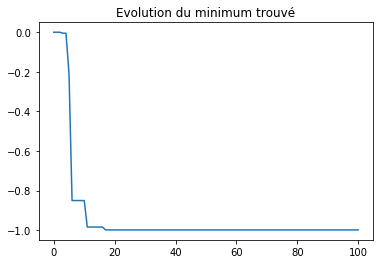

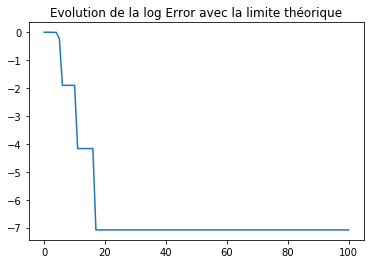

In [4]:
EP = EssaimParticulaire(n=40,xmin=-20,xmax=20,fonction=eossam2D,omega=1,alpha=1,beta=1)
EP.init2D()
EP.iterate(100)
#EP.plot2Din3D(100)
EP.plotfHistory()
EP.logError(-1)

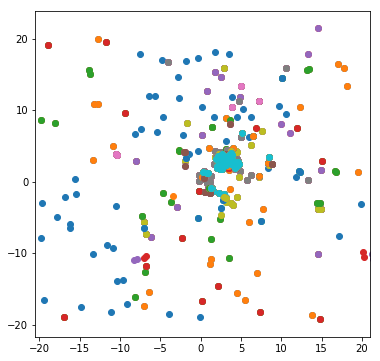

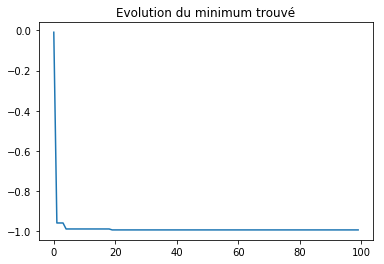

In [17]:
EP = EssaimParticulaire(n=100,xmin=-20,xmax=20,fonction=eossam2D,omega=1,alpha=1,beta=1)
EP.init2D()
#EP.iterate(10)
EP.plot2Din2D(100,save_mode=True, save_name="eossam2D")
EP.plotfHistory()

## EOSSAM en 3D

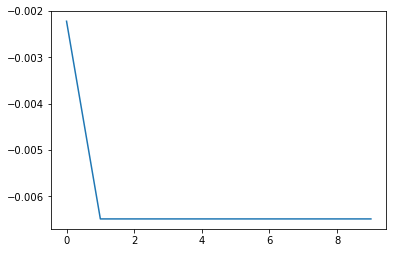

In [285]:
EP = EssaimParticulaire(n=100,xmin=-10,xmax=10,fonction=eossam3D,omega=2,alpha=.1,beta=.1)
EP.init3D()
EP.iterate(10)
#EP.plot2Din3D(10)
EP.plotfHistory()

## Boha

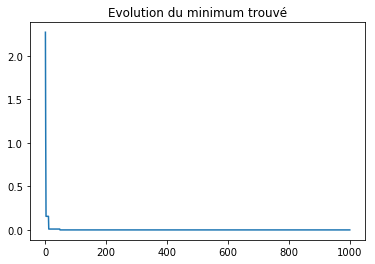

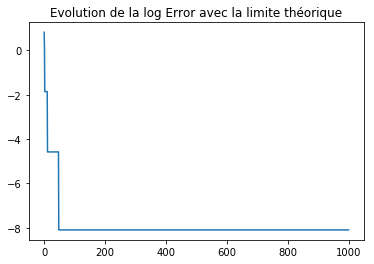

In [289]:
EP = EssaimParticulaire(n=100,xmin=-20,xmax=20,fonction=boha2D,omega=1,alpha=1,beta=1)
EP.init2D()
EP.iterate(1000)
#EP.plot2Din3D(100)
EP.plotfHistory()
EP.logError(0)

## Drop Wave 2D

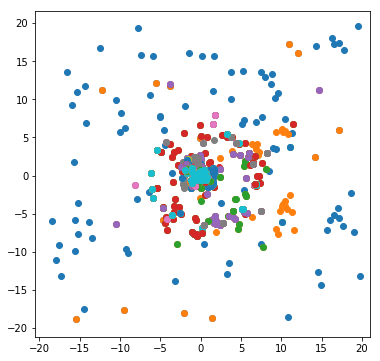

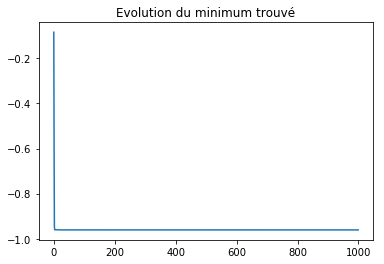

In [18]:
EP = EssaimParticulaire(n=100,xmin=-20,xmax=20,fonction=dropWave2D,omega=1,alpha=1,beta=1)
EP.init2D()
#EP.iterate(1000)
EP.plot2Din2D(1000,save_mode=True, save_name="dropWave2D")
EP.plotfHistory()

## Carre

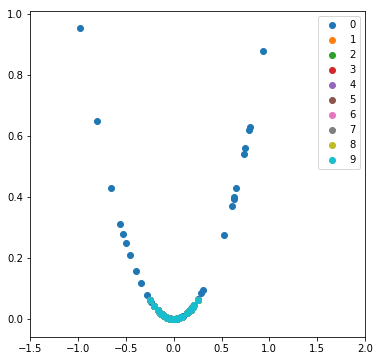

In [220]:
EP = EssaimParticulaire(n=40,xmin=-1,xmax=1,fonction=carre,omega=1,alpha=1,beta=1)
EP.init1D()
EP.plot1D(10)

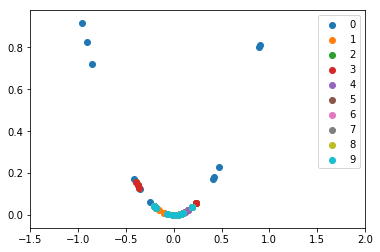

In [150]:
EP = EssaimParticulaire1D(n=12,xmin=-1,xmax=1,fonction=carre,omega=1,alpha=1,beta=1)
EP.init1D()
X,Y = EP.moment1D()
plt.scatter(X,Y,label="0")
for k in range(1,10):
    EP.oneStep1D()
    X,Y = EP.moment1D()
    plt.scatter(X,Y, label=str(k))
plt.xlim(EP.xmin-.5,EP.xmax+1)
plt.legend()
plt.show()
plt.close()